# Categorical and missing data
> This tutorial explores further concepts in Numpy such as, categorical data, advanced indexing and dealing with Not-a-Number (NaN) data.

- toc: false 
- badges: true
- comments: true
- categories: [numpy]

#### Before we start with this tutorial, let's have a quick look at a data structure in Python called dictionary. This will help us understand some of the materials in the tutorial and also will help to introduce XArray later on.

#### A dictionary represents a mapping between keys and values. The keys and values are Python objects of any type. We declare a dictionary using curly braces. Inside we can specify the keys and values using `:` as a separator and and commas to separate elements in the dictionary. For example:

In [ ]:
d = {1: 'one', 
     2: 'two', 
     3: 'tree'}

#### Then we can address or lookup elements in a dictionary using the `[ key_name ]` to address the value stored under a key. For example:

In [ ]:
print(d[1], " + ", d[2], " = ", d[3])

one  +  two  =  tree


#### Elements in a dictionary can be modified or new elements added by doing:

In [ ]:
d[3] = 'three'
d[4] = 'four'

print(d[1], " + ", d[2], " = ", d[3])

one  +  two  =  three


#### We start now this tutorial by importing some libraries:

In [ ]:
%matplotlib inline

import numpy as np
import imageio
from matplotlib import pyplot as plt
from matplotlib import colors
from check_answer import check_answer

#### Categorical data: sometimes remote sensing is used to create classification products. These products do not contain continuous values. They use discrete values to represent the different classes individual pixels can belong to. 

#### As an example, the following cell simulates a very simple image containing three different land cover types. Value `1` represents area covered with grass, `2` croplands and `3` city.

In [109]:
# grass = 1
area = np.ones((100,100))

# crops = 2
area[10:60,20:50] = 2

# city = 3
area[70:90,60:80] = 3

area.shape, area.dtype, np.unique(area)

((100, 100), dtype('float64'), array([1., 2., 3.]))

#### To visualise the previous array as an image, we are going to define our own colour map using a dictionary in which we can map values to colours:

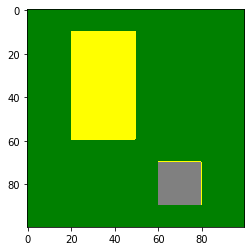

In [110]:
# We map the values to colours
index = {1: 'green', 2: 'yellow', 3: 'grey'}

# Create a discrete colour map
cmap = colors.ListedColormap(index.values())

# Plot
plt.imshow(area, cmap=cmap)

#### Exercise 6.1: The harvesting season has arrived and our cropping lands have changed colour to brown. Can you:

1. Modify the yellow area to contain the new value `4`?
2. Add a new entry to the `index` dictionary mapping number `4` to the value `brown`

('Well done!', 'Well done!')

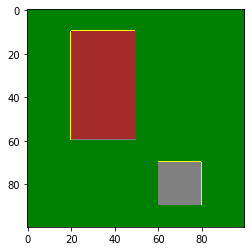

In [114]:
area[10:60,20:50] = 4 

index[4] = 'brown'

# Regenerate discrete colour map
cmap = colors.ListedColormap(index.values())
# Plot
plt.imshow(area, cmap=cmap)

check_answer("6.1.1", area[20,30]), check_answer("6.1.2", index[4])

#### Masking out regions is a very common practice in remote sensing analysis. For example, the following image reprensents a fake remote sensing image containing a few typical features.

<img src="data/land_mask.png" alt="drawing" width="220" align="left"/>

#### We start by loading the previous image into a numpy array:

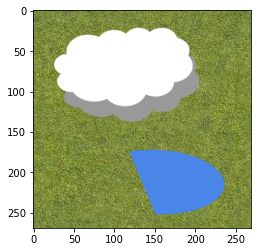

In [115]:
im = imageio.imread('data/land_mask.png')

plt.imshow(im)

#### In remote sensing analysis it's common to be interested in analysing certain features from the Earth surface such as vegetation. Clouds, cloud shadows and even water bodies need to be normally removed or 'masked' in order to process the data.

#### For this example, we have three files containing numpy arrays `.npy` which represent the masks to filter clouds, shadows and water from our image.

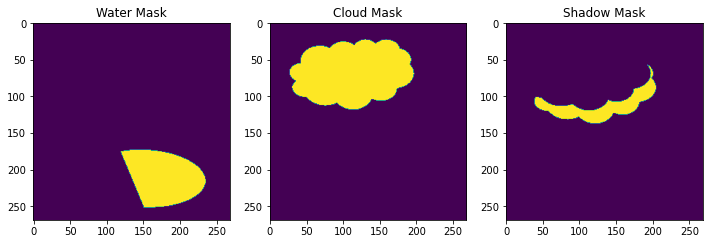

In [119]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,3) # set up a 1 x 3 grid of images

ax1=plt.subplot(gs[0,0])
water_mask = np.load("data/water_mask.npy")
plt.imshow(water_mask)
ax1.set_title('Water Mask')

ax2=plt.subplot(gs[0,1])
cloud_mask = np.load("data/cloud_mask.npy")

plt.imshow(cloud_mask)
ax2.set_title('Cloud Mask')

ax3=plt.subplot(gs[0,2])
shadow_mask = np.load("data/shadow_mask.npy")
plt.imshow(shadow_mask)
ax3.set_title('Shadow Mask')

plt.show()

#### These masks are stored as `dtype=uint8` using `1` to indicate presence and `0` for absence of each feature.

#### Exercise 6.2: Can you use the water mask to set all the pixels in the image array representing water to 0?

> Tip: Remember that boolean arrays can be used to index and select regions of another array. To complete this exercise you will need to convert the previous water mask array into boolean types before you can use it.

0


'Well done!'

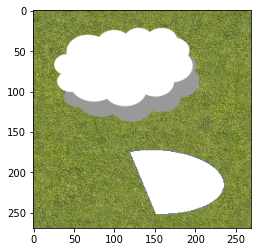

In [132]:
# 1.- Load the image
answ = imageio.imread('data/land_mask.png')

# 2.- Create a boolean version of the water_mask array
bool_water_mask = np.load('data/water_mask.npy').astype(bool)

# 3.- Use the previous boolean array to set all pixels in the answ array to 0
answ[bool_water_mask] = 0

# You should see the region with water white
plt.imshow(answ)

check_answer("6.2", answ[200,200])

#### Exercise 6.3: Can you do the same as in the previous exercise but now setting to zero the areas covered by clouds, shadows and water?

'Well done!'

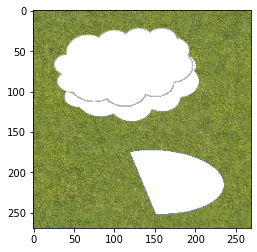

In [134]:
# 1.- Load the image
answ = imageio.imread('data/land_mask.png')

# 2.- Create boolean versions of the masks
bool_water_mask = np.load('data/water_mask.npy').astype(bool)
bool_cloud_mask = np.load('data/cloud_mask.npy').astype(bool)
bool_shadow_mask = np.load('data/shadow_mask.npy').astype(bool)

# 3.- Use the previous boolean arrays to set all pixels in the answ array to 0 (You might need more than one line)
answ[bool_water_mask + bool_cloud_mask + bool_shadow_mask] = 0
# You should see just green and all the other regions white
plt.imshow(answ)

check_answer("6.3", answ[200,200]+answ[100,100]+answ[100,180]+answ[0,0])

#### The previous example demonstrates how categorical data can be used to describe and filter remote sensing images.

#### In practice, we could have used one array to store our three classes. For example, we could have used the value `1` to designate areas with water, `2` for clouds and `3` for cloud shadows:

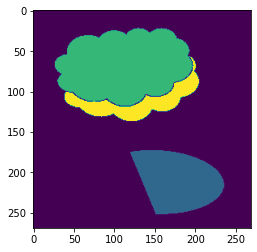

In [135]:
mask = water_mask*1 + cloud_mask*2 + shadow_mask*3

plt.imshow(mask)

#### But this way of representing categories is not very convenient for the case when we can have pixels that can belong to two or more categories at the same time. For example, if we have a pixel that is classified as a cloud shadow and water at the same time, we would need to come up with a new category to represent this case.

#### Instead, it's a common practice to use bit flags to create these masking or pixel quality products. Bit flags use the binary representation of a number (using 0s and 1s) to encode the different categories. For example a uint8 number can store values in the range [0-255] and is internally represented with 8 bits which can be either 0 or 1.

#### In our previous case we could have used the following encoding:

* Bit 0: Water
`00000001` -> 1
* Bit 1: Cloud
`00000010` -> 2
* Bit 2: Shadow
`00000100`-> 4

#### So, if one pixel is both classified as shadow and water, this pixel would be encoded by the value `5`:
* `00000101` -> 5

#### Exercise 6.4: How would you represent a pixel that is a cloud and a shadow at the same time?

In [ ]:
answ = ?

# Print binary format of answ
print(f"{answ:08b}")

check_answer("6.4", answ)

#### Some remote sensing collections contain ancillary data describing the quality of each pixel.  Below, you can see the table representing how to interpret the bit flags for the Landsat 8 pixel quality product. This product gives information about the quality of each pixel in the reflectance product.

<img src="data/ls8_pq.png" alt="drawing" width="220" align="left"/>

#### And this is a real example of a pixel quality Landsat 8 image over Margaret River encoded using the previous bit flags.

((7761, 7711),
 dtype('uint16'),
 Array([   1, 2720, 2724, 2752, 2800, 2976, 3008, 3744, 3776, 6816, 6896],
       dtype=uint16))

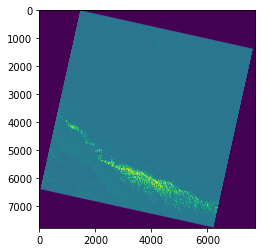

In [136]:
pq = imageio.imread('data/LC08_L1TP_112084_20190820_20190902_01_T1_BQA.tiff')

plt.imshow(pq)

pq.shape, pq.dtype, np.unique(pq)

#### For the value `2720` we can see the binary representation doing:

In [141]:
"{:016b}".format(2720)

'0000101010100000'

#### Starting from the right, we find: 
* bit 5 = 1 -> Cloud
* bits 6,7 = 10 -> Medium confidence
* bits 8,9 = 10 -> Cirrus medium confidence
* bit 11 = 1 -> We don't know, not included in the table

#### Exercise 6.5: Can you work out what is the Cirrus confidence interpretation for the `2976` value in the PQ mask?

In [144]:
print("{:016b}".format(2976)[6:8])

11


In [145]:
answ = "High"# Choose one of "None", "Low", "Medium", "High"

check_answer("6.5", answ)

'Well done!'

#### This is a good illustration of the use of bitmaks in the WOfS product:

| Attribute | Bit / position   | Decimal value |
|------|------|----|
| No data | 0:   `0-------` or `1-------` | 1|
| Non contiguous | 1:   `-0------` or `-1------` | 2 |
| Sea | 2:   `--0-----` or `--1-----` | 4 |
| Terrain or low solar angle | 3:   `---0----` or `---1----` | 8 |
| High slope | 4:   `----0---` or `----1---` | 16 |
| Cloud shadow | 5:   `-----0--` or `-----1--` | 32 |
| Cloud | 6:   `------0-` or `------1-` | 64 |
| Water | 7:   `-------0` or `-------1` | 128 |

#### Analysing data with NaNs. NaN is a special value of `float32` and `float64` arrays used to designate Not-a-Number values. For example:

In [138]:
arr = np.array([1,2,3,4,5,np.nan,7,8,9], dtype=np.float32)

arr

array([ 1.,  2.,  3.,  4.,  5., nan,  7.,  8.,  9.], dtype=float32)

#### To compute statistics on arrays containing NaN values, Numpy has special versions of common functions such as `mean`, `std` or `sum` that ignore the NaN values:

In [139]:
print(np.mean(arr))

print(np.nanmean(arr))

nan
4.875


#### We have been previously filtering out water and cloud effects from images by setting the pixels to `0`. However, if we are interested in performing statistics to summarise the information in the image, this could be problematic. For example, consider the following uint16 array in which the value `0` designates no data. If we want to compute the mean of all the valid values, we can do converting the array to float type and then assigning the value `0` to NaN.

In [140]:
arr = np.array([234,243,0,231,219,0,228,220,237], dtype=np.uint16)

print("0s mean:", np.mean(arr))

arr = arr.astype(np.float32)
arr[arr==0]=np.nan

print("NaNs mean:", np.nanmean(arr))

0s mean: 179.11111111111111
NaNs mean: 230.28572


#### Exercise 6.6: Can you calculate the mean value of the green channel for just the area covered with grass in the following image?

<img src="data/land_mask.png" alt="drawing" width="220" align="left"/>

'Well done!'

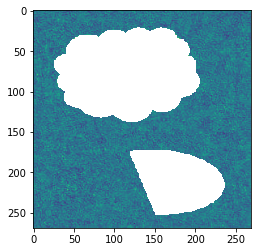

In [149]:
# 1.- Load the image
im = imageio.imread('data/land_mask.png')

# 2.- Select green channel
im = im[:,:,1]

# 3.- Change the type of im to float32
im = im.astype(np.float32)

# 4.- Use the previous boolean array to set all pixels other than grass to NaN
im[bool_water_mask + bool_cloud_mask + bool_shadow_mask] = np.NaN

# You should see the all NaN regions white
plt.imshow(im)

# 5.- Calculate the mean value
answ = np.nanmean(im)

check_answer("6.6", int(answ))